In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import linear_kernel
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
import pickle

import warnings
warnings.filterwarnings('ignore')

In [4]:
rating = pd.read_csv("rating.csv")

In [5]:
rating

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [6]:
rating.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,7813737.0,36727.956745,20997.946119,1.0,18974.0,36791.0,54757.0,73516.0
anime_id,7813737.0,8909.072104,8883.949636,1.0,1240.0,6213.0,14093.0,34519.0
rating,7813737.0,6.144030,3.727800,-1.0,6.0,7.0,9.0,10.0


In [7]:
anime = pd.read_csv("anime.csv")

In [8]:
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [9]:
anime.describe().T

,count,mean,std,min,25%,50%,75%,max
anime_id,12294.0,14058.221653,11455.294701,1.00,3484.25,10260.50,24794.50,34527.0
rating,12064.0,6.473902,1.026746,1.67,5.88,6.57,7.18,10.0
members,12294.0,18071.338864,54820.676925,5.00,225.00,1550.00,9437.00,1013917.0


In [10]:
anime = anime.dropna(axis=0).reset_index(drop=True)

In [11]:
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12012,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12013,5543,Under World,Hentai,OVA,1,4.28,183
12014,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12015,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [12]:
anime[anime.duplicated()].shape[0]

0

In [13]:
rating[rating.duplicated()].shape[0]

1

In [14]:
rating.drop_duplicates(keep='first',inplace=True)

In [15]:
rating

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


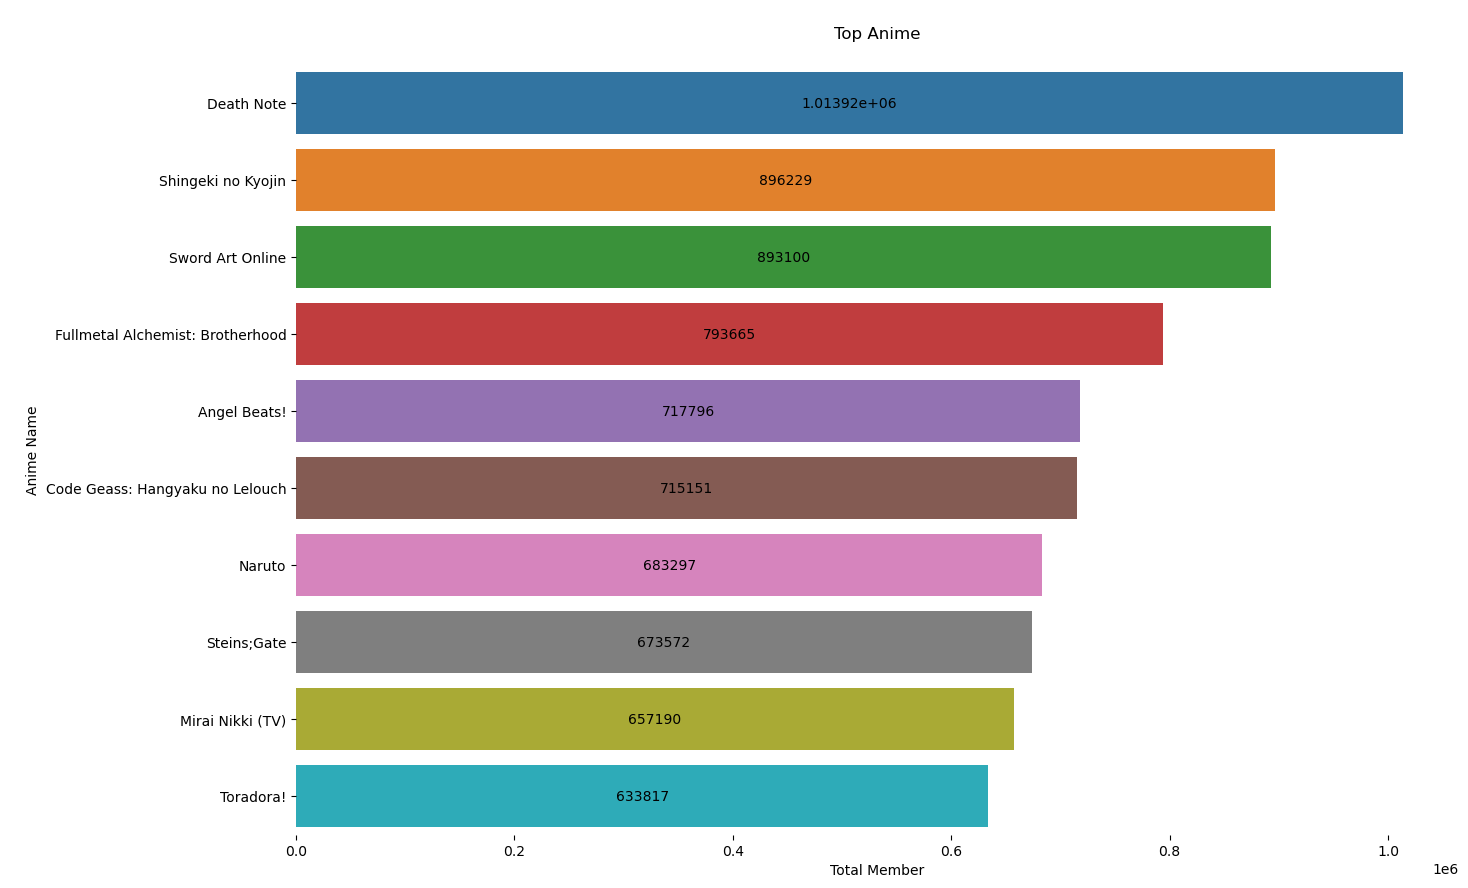

In [16]:
top_anime = anime.sort_values(["members"],ascending=False)

plt.subplots(figsize=(15,10))
p = sns.barplot(x=top_anime["members"], y=top_anime["name"][:10])
p.axes.set_title("\nTop Anime\n")
plt.xlabel("Total Member")
plt.ylabel("\nAnime Name")
for container in p.containers:
    p.bar_label(container,label_type = "center", color = "black")

sns.despine(left=True, bottom=True)
plt.show()

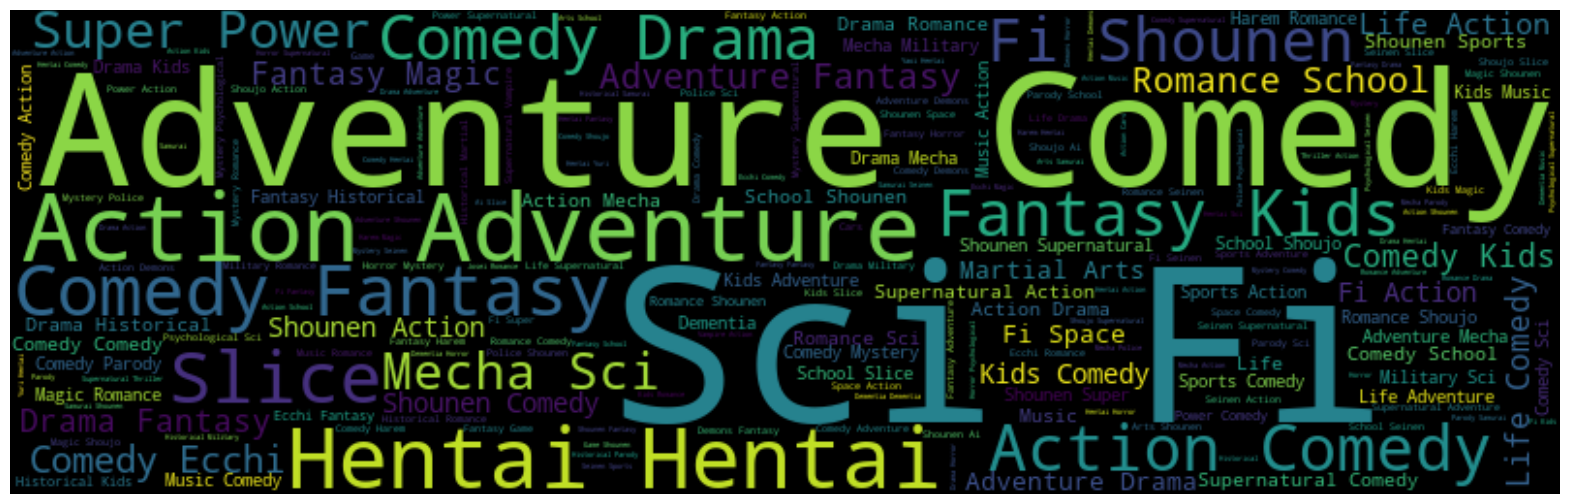

In [17]:
wordcloud = WordCloud(width=800, height=250, background_color="black").generate(anime["genre"].str.cat(sep=", "))

plt.figure(figsize=(20, 8)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
data=anime.merge(rating,on='anime_id')

In [19]:
data

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1
...,...,...,...,...,...,...,...,...,...
7813605,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,39532,-1
7813606,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,48766,-1
7813607,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,60365,4
7813608,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,27364,-1


In [20]:
data = data[data['rating_y'] != -1].reset_index(drop=True)

In [21]:
data

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10
...,...,...,...,...,...,...,...,...,...
6337140,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211,58483,1
6337141,5543,Under World,Hentai,OVA,1,4.28,183,49503,4
6337142,5543,Under World,Hentai,OVA,1,4.28,183,58483,1
6337143,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,49503,6


In [22]:
# Получение топ-10 популярных аниме
top_anime = data.sort_values(by='rating_y', ascending=False).head(10)

In [23]:
top_anime.head(10)

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
779868,1365,Detective Conan Movie 06: The Phantom of Baker...,"Adventure, Mystery, Police, Shounen",Movie,1,8.42,28462,16816,10
3646535,59,Chobits,"Comedy, Drama, Ecchi, Romance, Sci-Fi, Seinen",TV,26,7.57,266846,43124,10
1303108,14513,Magi: The Labyrinth of Magic,"Action, Adventure, Fantasy, Magic, Shounen",TV,25,8.24,317513,57008,10
2386177,20767,Noragami OVA,"Action, Adventure, Shounen",OVA,2,7.89,104775,46622,10
5326560,24133,Taimadou Gakuen 35 Shiken Shoutai,"Action, Ecchi, Fantasy, Harem, Military, Roman...",TV,12,7.05,99133,32049,10
1812089,10620,Mirai Nikki (TV),"Action, Mystery, Psychological, Shounen, Super...",TV,26,8.07,657190,69132,10
719396,28701,Fate/stay night: Unlimited Blade Works 2nd Season,"Action, Fantasy, Magic, Shounen, Supernatural",TV,13,8.45,205987,30523,10
3646523,59,Chobits,"Comedy, Drama, Ecchi, Romance, Sci-Fi, Seinen",TV,26,7.57,266846,42791,10
719399,28701,Fate/stay night: Unlimited Blade Works 2nd Season,"Action, Fantasy, Magic, Shounen, Supernatural",TV,13,8.45,205987,30561,10
719400,28701,Fate/stay night: Unlimited Blade Works 2nd Season,"Action, Fantasy, Magic, Shounen, Supernatural",TV,13,8.45,205987,30597,10


In [24]:
df1 = pd.read_csv('anime.csv', low_memory=True)
df1 = df1.replace("Unknown", np.nan)

In [25]:
df1

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [26]:
df1

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [27]:
def getAnimeFrame(anime):
    if isinstance(anime, int):
        return df1[df1.anime_id == anime]
    if isinstance(anime, str):
        return df1[df1.eng_version == anime]

In [28]:
df1['genre'] = df1['genre'].fillna('')

In [29]:
# Получение рекомендаций по названию 

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df1['name'])
cosine_sim_genre = linear_kernel(tfidf_matrix, tfidf_matrix)

def get_recommendations_by_name(title, cosine_sim=cosine_sim_genre):
    idx = df1.index[df1['name'] == title][0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df1['name'].iloc[movie_indices]

In [30]:
print("\nРекомендации по Названию:")
print(get_recommendations_by_name('Hunter x Hunter'))


Рекомендации по Названию:
145                         Hunter x Hunter OVA
2046                      Hunter x Hunter Pilot
6                        Hunter x Hunter (2011)
2108    Hunter x Hunter Movie: The Last Mission
202               Hunter x Hunter: Greed Island
1974       Hunter x Hunter Movie: Phantom Rouge
146         Hunter x Hunter: Greed Island Final
390                               City Hunter 2
523                                 City Hunter
584                               City Hunter 3
Name: name, dtype: object


In [31]:
def get_get_recommendations_by_genres(genre):
    return df1[df1['genre'].str.contains(genre)].sort_values('rating', ascending=False).head(10)

In [32]:
print("\nРекомендации по жанру:")
get_get_recommendations_by_genres("Romance")


Рекомендации по жанру:


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
10,4181,Clannad: After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",TV,24,9.06,456749
16,23273,Shigatsu wa Kimi no Uso,"Drama, Music, Romance, School, Shounen",TV,22,8.92,416397
21,44,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...,"Action, Drama, Historical, Martial Arts, Roman...",OVA,4,8.83,129307
25,7311,Suzumiya Haruhi no Shoushitsu,"Comedy, Mystery, Romance, School, Sci-Fi, Supe...",Movie,1,8.81,240297
26,17074,Monogatari Series: Second Season,"Comedy, Mystery, Romance, Supernatural, Vampire",TV,26,8.80,205959
35,431,Howl no Ugoku Shiro,"Adventure, Drama, Fantasy, Romance",Movie,1,8.74,333186
39,12365,Bakuman. 3rd Season,"Comedy, Drama, Romance, Shounen",TV,25,8.71,133620
45,4282,Kara no Kyoukai 5: Mujun Rasen,"Action, Drama, Mystery, Romance, Supernatural,...",Movie,1,8.68,111074
50,7785,Yojouhan Shinwa Taikei,"Mystery, Psychological, Romance",TV,11,8.65,122531


In [35]:
data.to_csv("data.csv", sep='\t')
df1.to_csv("anime2.csv", sep='\t')

with open('tfidf_matrix.pkl','wb') as f:
    pickle.dump(tfidf_matrix,f)